In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### DATA PREPROCESSING

Training Image Preprocessing

In [2]:
trainingSet = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [3]:
ValidationSet = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
trainingSet

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in trainingSet:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[ 83.5   74.25  73.  ]
   [154.   144.   142.  ]
   [158.5  148.5  146.5 ]
   ...
   [144.   133.   127.  ]
   [146.75 135.75 129.75]
   [149.   138.   132.  ]]

  [[ 85.    75.75  74.25]
   [158.5  148.5  146.5 ]
   [162.5  152.5  150.5 ]
   ...
   [150.25 139.25 133.25]
   [147.   136.   130.  ]
   [147.75 136.75 130.75]]

  [[ 83.75  75.25  74.25]
   [165.   155.   153.  ]
   [165.   155.   153.  ]
   ...
   [149.5  138.5  132.5 ]
   [140.75 129.75 123.75]
   [145.25 134.25 128.25]]

  ...

  [[ 92.    85.    84.  ]
   [170.25 162.25 160.25]
   [170.5  162.5  160.5 ]
   ...
   [165.5  156.5  149.5 ]
   [161.75 152.75 145.75]
   [164.   155.   148.  ]]

  [[ 91.5   84.5   83.5 ]
   [170.25 162.25 160.25]
   [169.5  161.5  159.5 ]
   ...
   [167.25 158.25 151.25]
   [167.   158.   151.  ]
   [168.75 159.75 152.75]]

  [[ 94.75  87.    86.  ]
   [173.25 165.25 163.25]
   [172.   164.   162.  ]
   ...
   [172.   163.   156.  ]
   [169.   160.   153.  ]
   [162.25 153.25 14

### MODEL BUILDING

In [10]:
import keras
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = keras.Sequential()

In [9]:
## Convolution layers

In [13]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

C:\Users\rahul\anaconda3\envs\pdps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
## Hidden Layer
model.add(Dense(units=1500,activation='relu'))      ## neurons 

In [22]:
model.add(Dropout(0.4))                          ## to avoid overfitting

In [23]:
## Output Layer
model.add(Dense(units=38,activation='softmax'))

### MODEL COMPILING

In [24]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 0, 0, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 0, 0, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 0, 0, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,065,930 (19.32 MB)

 Trainable params: 5,065,930 (19.32 MB)

 Non-trainable params: 0 (0.00 B)

### MODEL TRAINING

In [24]:
training_model = model.fit(x=trainingSet, validation_data=ValidationSet, epochs=4)

Epoch 1/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3084s 1s/step - accuracy: 0.3811 - loss: 2.2086 - val_accuracy: 0.8084 - val_loss: 0.5979
Epoch 2/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3338s 2s/step - accuracy: 0.8259 - loss: 0.5495 - val_accuracy: 0.8904 - val_loss: 0.3446
Epoch 3/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3027s 1s/step - accuracy: 0.8997 - loss: 0.3072 - val_accuracy: 0.9174 - val_loss: 0.2557
Epoch 4/4
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3109s 1s/step - accuracy: 0.9333 - loss: 0.2052 - val_accuracy: 0.9201 - val_loss: 0.2578


### MODEL EVALUATION

In [26]:
## Evaluation on Training set
train_loss,train_acc = model.evaluate(trainingSet)

ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 2 for '{{node sequential_1_1/conv2d_11_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1_1/conv2d_10_1/Relu, sequential_1_1/conv2d_11_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,512], [3,3,512,512].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 512), dtype=float32)

In [45]:
# print("Training Loss: ",train_loss)
print("Training Accuracy: ",train_acc)

Training Accuracy:  0.9478625655174255


In [27]:
## Evaluation on Validation set
valid_loss,valid_acc = model.evaluate(ValidationSet)

550/550 ━━━━━━━━━━━━━━━━━━━━ 438s 786ms/step - accuracy: 0.9199 - loss: 0.2532


In [46]:
# print("Validation Loss: ",valid_loss)
print("Validation Accuracy: ",valid_acc)

Validation Accuracy:  0.9201001524925232


### Saving Model

In [33]:
model.save("Trained_model.h5")

In [34]:
model.save("Trained_model.keras")

In [35]:
training_model.history

{'accuracy': [0.5825592279434204,
  0.8524646162986755,
  0.9104061722755432,
  0.9382886290550232],
 'loss': [1.4143143892288208,
  0.46401309967041016,
  0.27581343054771423,
  0.18963651359081268],
 'val_accuracy': [0.808388352394104,
  0.8903937935829163,
  0.9174254536628723,
  0.9201001524925232],
 'val_loss': [0.5978874564170837,
  0.3446197807788849,
  0.2556716501712799,
  0.25779327750205994]}

In [36]:
## record history in json file
import json
with open("training_history.json","w") as f:
    json.dump(training_model.history,f)

### Accuracy Visualization

In [40]:
epochs = [ i for i in range(1,5)]
epochs

[1, 2, 3, 4]

In [6]:
training_model.history['accuracy']
# training_model.history['val_accuracy']

NameError: name 'training_model' is not defined

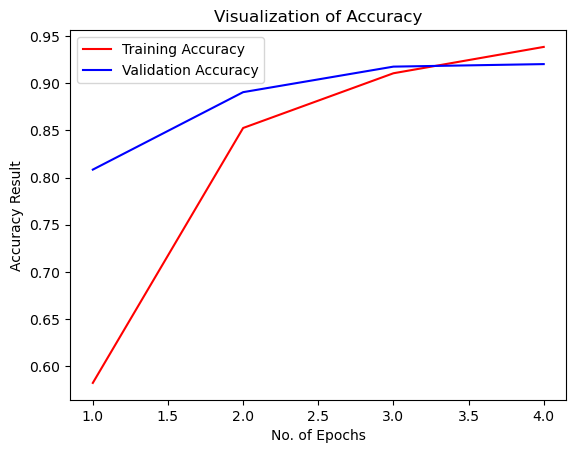

In [44]:
plt.plot(epochs, training_model.history['accuracy'], color='red',  label ='Training Accuracy')
plt.plot(epochs, training_model.history['val_accuracy'], color='blue',  label ='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()

In [5]:
class_name = ValidationSet.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

NameError: name 'confusion_matrix' is not defined